In [1]:
# Set-up Python libraries - you need to run this but you don't need to change it
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import seaborn as sns
sns.set_theme(style='white')
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [2]:
CrimeSurvey= pd.read_csv('../data/CrimeSurvey.csv')
CrimeSurvey.replace(9999,np.NaN, inplace=True)
CrimeSurvey

,ID,Sex,Age,EthnicGroup,Education,SES,DeprivationIndex,bcsvictim,effectx,fairx,confx,antisocx
0,135230170.0,1.0,45.0,1.0,4.0,2.0,3.0,0.0,NaN,NaN,2.29,3.42
1,135230210.0,1.0,28.0,1.0,4.0,1.0,4.0,0.0,-0.75,NaN,-0.31,-0.52
2,135231010.0,2.0,58.0,4.0,1.0,5.0,2.0,0.0,-1.34,-0.53,0.41,2.27
3,135231210.0,1.0,70.0,3.0,2.0,3.0,4.0,0.0,NaN,NaN,NaN,NaN
4,135233210.0,2.0,64.0,1.0,5.0,5.0,5.0,0.0,0.16,0.91,-0.57,0.84
...,...,...,...,...,...,...,...,...,...,...,...,...
9295,147638210.0,1.0,43.0,1.0,4.0,1.0,NaN,0.0,-0.43,NaN,-0.98,0.31
9296,147639090.0,1.0,70.0,1.0,1.0,5.0,NaN,0.0,0.14,NaN,1.07,-0.45
9297,147639130.0,2.0,80.0,1.0,1.0,5.0,NaN,0.0,NaN,NaN,0.83,0.27
9298,147639250.0,1.0,86.0,1.0,4.0,1.0,NaN,0.0,-0.44,0.41,1.72,-0.56


<Axes: xlabel='Age', ylabel='confx'>

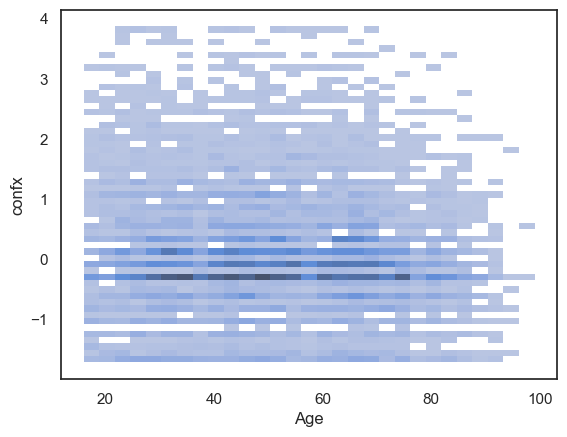

In [3]:
sns.histplot(data=CrimeSurvey, x='Age', y='confx')

<Axes: xlabel='EthnicGroup', ylabel='confx'>

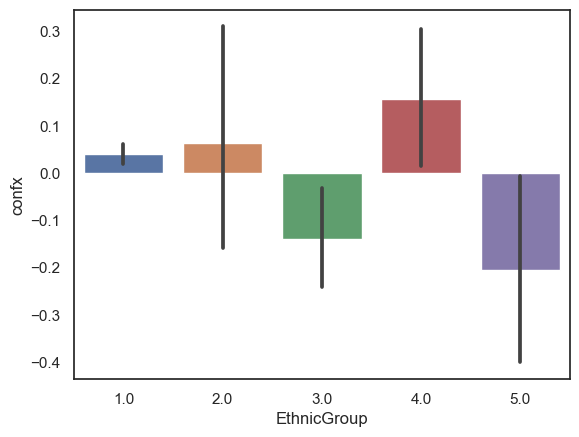

In [4]:
sns.barplot(data=CrimeSurvey, y='confx', x='EthnicGroup')

<Axes: xlabel='bcsvictim', ylabel='confx'>

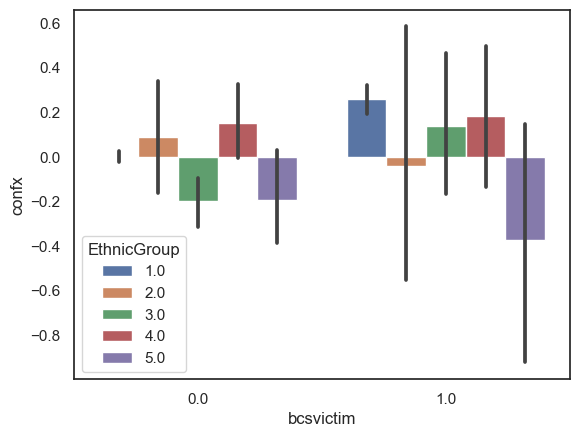

In [5]:
sns.barplot(data=CrimeSurvey, y='confx', x='bcsvictim', hue='EthnicGroup')